# **Importing the Libraries**

In [2]:
!pip install numpy==1.26.4
!pip install spacy
!pip install contourpy
!pip install pydicom-seg
!pip install numba
!pip install emoji
!pip install bokeh datashader matplotlib
!python -m spacy download en_core_web_sm
!pip install --upgrade pandas matplotlib seaborn nltk transformers wordcloud
!pip install scikit-learn

  Using cached numpy-2.0.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
Using cached numpy-2.0.2-cp312-cp312-macosx_14_0_arm64.whl (5.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydicom-seg 0.4.1 requires numpy<2.0.0,>=1.18.0, but you have numpy 2.0.2 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.0.2 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.0.2 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.0.2 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.0.2 which is incompatible.
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.met

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk, spacy, re, string, emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import pipeline
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
from sklearn.metrics import confusion_matrix

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muthonikangethe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muthonikangethe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/muthonikangethe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/muthonikangethe/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/muthonikangethe/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to

In [4]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: /Users/muthonikangethe/.kaggle: File exists
cp: kaggle.json: No such file or directory
chmod: /Users/muthonikangethe/.kaggle/kaggle.json: No such file or directory


# **Loading the dataset**

In [6]:
import pandas as pd

df = pd.read_csv('./Downloads/IMDB Dataset.csv')

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# **Exploratory Data Analysis**

This section is dedicated to Exploratory Data Analysis (EDA), a crucial step in understanding the underlying structure and patterns of the dataset.

In [9]:
df.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


Providing a summary of the DataFrame, including the number of entries, column names, data types, and non-null counts for each column.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## **Sentiment Distribution**

In this section, we aim to analyze and visualize the distribution of sentiments from movie reviews contained in the DataFrame.

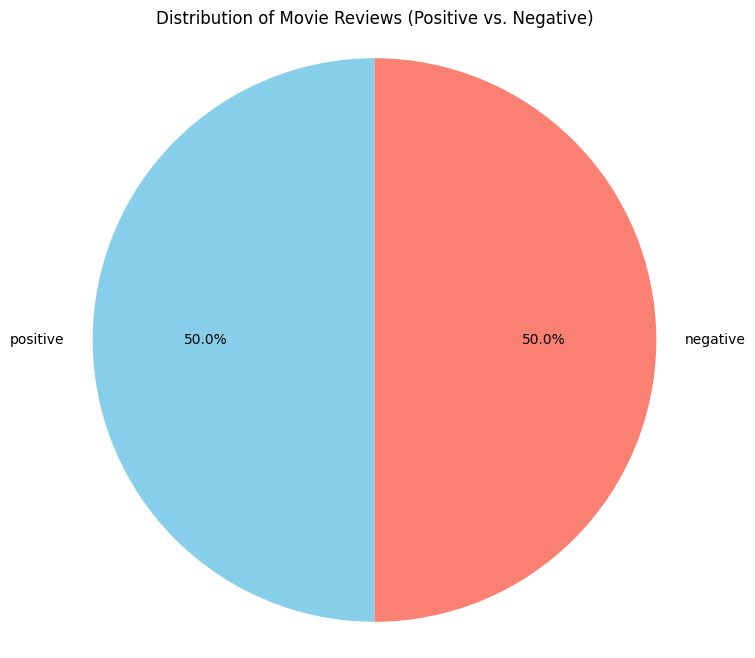

In [14]:
review_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(review_counts, labels=review_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribution of Movie Reviews (Positive vs. Negative)')
plt.axis('equal')
plt.show()

# **Data Cleaning**

### **Handling contractions**

This section addresses the preprocessing of textual data by expanding contractions commonly found in the English language. A dictionary is defined, mapping each contraction (e.g., "can't", "won't") to its expanded form (e.g., "cannot", "will not"). This transformation is essential for standardizing the text data and improving the performance of natural language processing tasks, as it eliminates variations in word forms that may hinder analysis.

In [18]:
contractions_dict = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "I'd": "I would",
    "I'll": "I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it's": "it is",
    "let's": "let us",
    "mightn't": "might not",
    "might've": "might have",
    "mustn't": "must not",
    "must've": "must have",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "shouldn't": "should not",
    "should've": "should have",
    "that'll": "that will",
    "that's": "that is",
    "there'd": "there would",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "where's": "where is",
    "who'd": "who would",
    "who'll": "who will",
    "who's": "who is",
    "why's": "why is",
    "won't": "will not",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have",
    "y'all": "you all",
    "could've": "could have",
    "would've": "would have",
    "should've": "should have",
    "it'd": "it would",
    "didn't": "did not",
    "doesn't": "does not",
    "haven't": "have not",
    "hasn't": "has not",
    "hadn't": "had not",
    "there'd": "there would",
    "how's": "how is",
    "where'd": "where did",
    "how'd": "how did",
    "why'd": "why did",
    "let's": "let us",
    "needn't": "need not",
    "oughtn't": "ought not",
    "daren't": "dare not",

}

def expand_contractions(text):
    for contraction, expansion in contractions_dict.items():
        text = text.replace(contraction, expansion)
    return text

df['cleaned_review'] = df['review'].apply(expand_contractions)

In [19]:
df.head(40)

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is..."
5,"Probably my all-time favorite movie, a story o...",positive,"Probably my all-time favorite movie, a story o..."
6,I sure would like to see a resurrection of a u...,positive,I sure would like to see a resurrection of a u...
7,"This show was an amazing, fresh & innovative i...",negative,"This show was an amazing, fresh & innovative i..."
8,Encouraged by the positive comments about this...,negative,Encouraged by the positive comments about this...
9,If you like original gut wrenching laughter yo...,positive,If you like original gut wrenching laughter yo...


### **Removing the NER**

This section focuses on the preprocessing step of removing named entities from the text data of movie reviews. Named entities, such as people, organizations, and locations, can introduce noise and distract from the sentiment analysis or other natural language processing tasks. By employing natural language processing techniques, this process involves analyzing the text to identify and filter out these entities, ensuring a cleaner dataset. Additionally, any initials or abbreviations that may remain in the text are also eliminated to further refine the data.

In [22]:
nlp = spacy.load("en_core_web_sm")
nlp.disable_pipe("parser")
nlp.add_pipe("sentencizer")
def custom_remove_entities(text):
    doc = nlp(text)
    filtered_tokens = [token.text for token in doc if not token.ent_type_]

    text_without_spacy_entities = ' '.join(filtered_tokens)
    text_cleaned = re.sub(r'\b[A-Z]\.[A-Za-z]+\b', '', text_without_spacy_entities)  # Regex to remove initials like "J.Beals"
    return text_cleaned

df['cleaned_review'] = df['cleaned_review'].apply(custom_remove_entities)

df.head(10)

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,of the other reviewers has mentioned that afte...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production . < br /><br />T...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei 's "" in the Time of Money "" is a..."
5,"Probably my all-time favorite movie, a story o...",positive,"Probably my all - time favorite movie , a stor..."
6,I sure would like to see a resurrection of a u...,positive,I sure would like to see a resurrection of a u...
7,"This show was an amazing, fresh & innovative i...",negative,"This show was an amazing , fresh & innovative ..."
8,Encouraged by the positive comments about this...,negative,Encouraged by the positive comments about this...
9,If you like original gut wrenching laughter yo...,positive,If you like original gut wrenching laughter yo...


In [23]:
df.to_csv('Dataset.csv', index=False)

In [24]:
!ls /content

ls: /content: No such file or directory


In [25]:
df = pd.read_csv('Dataset.csv')

In [26]:
df.head(10)

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,of the other reviewers has mentioned that afte...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production . < br /><br />T...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei 's "" in the Time of Money "" is a..."
5,"Probably my all-time favorite movie, a story o...",positive,"Probably my all - time favorite movie , a stor..."
6,I sure would like to see a resurrection of a u...,positive,I sure would like to see a resurrection of a u...
7,"This show was an amazing, fresh & innovative i...",negative,"This show was an amazing , fresh & innovative ..."
8,Encouraged by the positive comments about this...,negative,Encouraged by the positive comments about this...
9,If you like original gut wrenching laughter yo...,positive,If you like original gut wrenching laughter yo...


### **Removing the HTML Tags**

This section addresses the cleaning of movie review text by removing HTML tags that may be present in the raw data. HTML tags can interfere with the analysis by introducing unwanted formatting and characters, which can obscure the true content of the reviews. The process involves parsing the text to extract the visible content while eliminating any HTML markup.

In [29]:
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    clean_text = soup.get_text(separator=" ")
    clean_text = re.sub(r'<.*?>', '', clean_text)  # Remove any lingering HTML tags
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()  # Clean extra spaces
    return clean_text

df['cleaned_review'] = df['cleaned_review'].apply(remove_html_tags)
df.head()

/var/folders/bg/x64ncvbx1vv_c7_7d1fn_w8r0000gn/T/ipykernel_3948/3769454337.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,of the other reviewers has mentioned that afte...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production . The filming te...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei 's "" in the Time of Money "" is a..."


### **Removing URLs from text**

This section is dedicated to cleaning the movie review text by removing any URLs present in the content. URLs can detract from the meaningful analysis of text data, as they do not contribute to the sentiment or thematic interpretation of the reviews. The process involves scanning the text for patterns that match web addresses and eliminating them, thereby ensuring that the remaining content is more focused and relevant. Following the removal of URLs, any resulting extra whitespace is also cleaned up to maintain a tidy format. This preprocessing step results in a refined dataset where the reviews are clearer and more conducive to subsequent analysis, enhancing the overall quality of the textual data.



In [32]:
def remove_urls(text):
    clean_text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()
    return clean_text

df['cleaned_review'] = df['cleaned_review'].apply(remove_urls)

pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
df.iloc[1137][['review', 'cleaned_review']]

review            I really think I should make my case and have every(horror and or cult)movie-buff go and see this movie...<br /><br />I did!<br /><br />It-is-excellent: Very atmospheric and unsettling and scary...<br /><br />Incridible how they could make such a gem of a film with the very low(read-"no"!)-budget they had....<br /><br />Synopsis taken from website: "One morning, an old man wanders out into the woods in search of his runaway cat. He finds instead a child without parents and a murder with no corpse..."<br /><br />On this website(IMDb) there is no trailer, but I will leave a link here to the site of the movie itself where there IS a trailer which is quite unsettling so please go and check it out...<br /><br />www.softfordigging.com
cleaned_review                                                                                                                I really think I should make my case and have and or cult)movie - buff go and see this movie ... I did! It - is - exc

### **Removing emojis**

In [34]:
!pip install emoji

This section focuses on refining the movie review text by removing any emojis present in the content. Emojis can add a layer of expression but may not contribute meaningfully to the sentiment analysis or overall textual interpretation. The process involves identifying and eliminating emojis from the reviews, which helps in standardizing the text and ensuring that it is more suitable for subsequent analytical tasks.

In [36]:
def remove_emojis(text):
    clean_text = emoji.replace_emoji(text, replace='')
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()
    return clean_text

df['cleaned_review'] = df['cleaned_review'].apply(remove_emojis)
df.to_csv('IMDB Dataset.csv', index=False)

### **Removing punctuations**

This section is dedicated to enhancing the clarity of movie review text by removing punctuation marks. Punctuation can often introduce noise and distract from the core content, particularly in sentiment analysis and other text-based evaluations. The process involves systematically identifying and eliminating all punctuation characters from the reviews, resulting in cleaner text that is more focused on the words themselves. Following the removal of punctuation, any extra whitespace created during this process is also addressed to ensure a tidy and consistent format.

In [39]:
def remove_punctuation(text):
    clean_text = text.translate(str.maketrans('', '', string.punctuation))
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()
    return clean_text

df['cleaned_review'] = df['cleaned_review'].apply(remove_punctuation)
df.head()

,review,sentiment,cleaned_review
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,of the other reviewers has mentioned that after watching just Oz episode you will be hooked They are right as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the word It is called as that is the nickname given to It focuses mainly on an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda is home to many gangstas and more so scuffles death stares dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows would not dare Forget pretty pictures painted for mainstream audiences forget charm forget romance OZ does not mess around The episode I ever saw struck me as so nasty it was surreal I could not say I was ready for it but as I watched more I developed a taste for Oz and got accustomed to the high levels of graphic violence Not just violence but injustice crooked guards who will be sold out for a nickel inmates who will kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience Watching Oz you may become comfortable with what is uncomfortable viewing thats if you can get in touch with your darker side
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really 

### **Removing extra white space**

This section focuses on cleaning the movie review text by removing any extra whitespace that may exist in the content. Extra whitespace can result from previous preprocessing steps, leading to uneven formatting and potential confusion in the text. The process involves identifying and consolidating multiple consecutive whitespace characters into a single space, thereby enhancing the readability and uniformity of the text.



In [42]:
def remove_extra_whitespace(text):
    clean_text = re.sub(r'\s+', ' ', text).strip()
    return clean_text

df['cleaned_review'] = df['cleaned_review'].apply(remove_extra_whitespace)

### **Removing numbers**

This section addresses the preprocessing of movie review text by removing numerical values and their corresponding word representations. Numbers can clutter the text and may not contribute meaningfully to sentiment analysis or thematic interpretation. Any numeric characters are eliminated to further cleanse the content. Following these removals, any resulting extra whitespace is consolidated to ensure a clean and uniform presentation. This preprocessing step results in a refined dataset where the reviews are free from numbers, enhancing their clarity and focus for subsequent analysis and interpretation of sentiment.

In [45]:
def remove_numbers(text):
    number_words = {
        'zero': '', 'one': '', 'two': '', 'three': '', 'four': '', 'five': '',
        'six': '', 'seven': '', 'eight': '', 'nine': '', 'ten': '',
        'eleven': '', 'twelve': '', 'thirteen': '', 'fourteen': '', 'fifteen': '',
        'sixteen': '', 'seventeen': '', 'eighteen': '', 'nineteen': '',
        'twenty': '', 'thirty': '', 'forty': '', 'fifty': '', 'sixty': '',
        'seventy': '', 'eighty': '', 'ninety': '',
        'twenty-one': '', 'twenty-two': '', 'twenty-three': '', 'twenty-four': '', 'twenty-five': '',
        'twenty-six': '', 'twenty-seven': '', 'twenty-eight': '', 'twenty-nine': '',
        'thirty-one': '', 'thirty-two': '', 'thirty-three': '', 'thirty-four': '', 'thirty-five': '',
        'thirty-six': '', 'thirty-seven': '', 'thirty-eight': '', 'thirty-nine': '',
        'forty-one': '', 'forty-two': '', 'forty-three': '', 'forty-four': '', 'forty-five': '',
        'forty-six': '', 'forty-seven': '', 'forty-eight': '', 'forty-nine': '',
        'fifty-one': '', 'fifty-two': '', 'fifty-three': '', 'fifty-four': '', 'fifty-five': '',
        'fifty-six': '', 'fifty-seven': '', 'fifty-eight': '', 'fifty-nine': '',
        'sixty-one': '', 'sixty-two': '', 'sixty-three': '', 'sixty-four': '', 'sixty-five': '',
        'sixty-six': '', 'sixty-seven': '', 'sixty-eight': '', 'sixty-nine': '',
        'seventy-one': '', 'seventy-two': '', 'seventy-three': '', 'seventy-four': '', 'seventy-five': '',
        'seventy-six': '', 'seventy-seven': '', 'seventy-eight': '', 'seventy-nine': '',
        'eighty-one': '', 'eighty-two': '', 'eighty-three': '', 'eighty-four': '', 'eighty-five': '',
        'eighty-six': '', 'eighty-seven': '', 'eighty-eight': '', 'eighty-nine': '',
        'ninety-one': '', 'ninety-two': '', 'ninety-three': '', 'ninety-four': '', 'ninety-five': '',
        'ninety-six': '', 'ninety-seven': '', 'ninety-eight': '', 'ninety-nine': '',
        'hundred': '', 'thousand': '', 'million': '', 'billion': ''
    }

    pattern = r'\b(' + '|'.join(number_words.keys()) + r')\b'
    clean_text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    clean_text = re.sub(r'\d+', '', clean_text)
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()

    return clean_text

df['cleaned_review'] = df['cleaned_review'].apply(remove_numbers)

In [46]:
df.iloc[1145][['review', 'cleaned_review']]

review            Winchester 73 gets credit from many critics for bringing back the western after WWII. Director Anthony Mann must get a lot of credit for his excellent direction. Jimmy Stewart does an excellent job, but I think Stephen McNalley and John McIntire steal the movie with their portrayal of two bad guys involved in a high stakes poker game with the treasured Winchester 73 going to the winner. This is a good script with several stories going on at the same time. Look for the first appearance of Rock Hudson as Young Bull. Thank God, with in a few years, we would begin to let Indians play themselves in western films. The film is in black and white and was shot in Tucson Arizona. I would not put Winchester 73 in the category of Stagecoach, High Noon or Shane, but it gets an above average recommendation from me.<br /><br />.
cleaned_review                                                                                                                                              

In [47]:
df.iloc[1141][['review', 'cleaned_review']]

review            This show has to be my favorite out of all the 80's horror TV shows. Like Tales from the Darkside, also from the same creators, this show is a rare gem. If you agree with me, PLEASE sign this petition I started, to get the word out for Monsters and get it out on DVD. Here is the petition address: www.petitiononline.com/19784444/petition.html Some of my favorite episodes would have to be Glim glim, and Rain Dance. I also loved the opening intro with the monster family. That used to creep me out! One of the things I would have to ask the DVD creators to include would be the organ sound heard right before where the commercial break would be. I don't know if any of you remember that part but that's one of the main things that brings back memories to me. I mean, come on! War of the Worlds the TV series already has been released on DVD, so I say Monsters, and also Tales from the Darkside, and Friday the 13th the series should be released too! We the fans need to speak our m

### **Handling Negations**

This section focuses on refining the movie review text by addressing common negations that can alter the meaning of sentiments expressed in the reviews. Negations such as "not good," "not great," and "not enjoyable" can create confusion in sentiment analysis if left unprocessed. The approach involves defining a mapping of various negation phrases to their corresponding positive or negative replacements, ensuring that the sentiments are accurately represented. By systematically replacing these phrases in the text, the process enhances clarity and allows for more accurate interpretation of the underlying sentiments.



In [50]:
def handle_negations(text):
    negations = {
    "not good": "bad",
    "not great": "bad",
    "not bad": "good",
    "not happy": "unhappy",
    "not satisfied": "unsatisfied",
    "not recommend": "recommend against",
    "never": "ever",
    "no": "any",
    "n't": "",
    "not like": "dislike",
    "not true": "false",
    "not worth": "worthless",
    "not interested": "disinterested",
    "not enough": "insufficient",
    "not clear": "unclear",
    "not easy": "difficult",
    "not helpful": "unhelpful",
    "not possible": "impossible",
    "not worth it": "worthless",
    "not sure": "unsure",
    "not appealing": "unappealing",
    "not necessary": "unnecessary",
    "not exciting": "uninspiring",
    "not convenient": "inconvenient",
    "not reliable": "unreliable",
    "not good enough": "inadequate",
    "not friendly": "unfriendly",
    "not the best": "inferior",
    "not comfortable": "uncomfortable",
    "not great at": "poor at",
    "not enjoyable": "unenjoyable",
    "not worth the time": "a waste of time",
    "not impressed": "underwhelmed",
    "not what I expected": "disappointing",
    "not suitable": "unsuitable",
    "not confident": "doubtful",
    "not ideal": "suboptimal",
    "not quite": "somewhat",
    "not always": "rarely",
    "not really": "barely",
    "not entirely": "partially",
    "not as good as": "inferior to",
    "not better than": "worse than",
    "not much of": "little to no",
    "not my favorite": "least favorite",
    "not loving": "disliking",
    "not thankful": "ungrateful",
    "not suitable for": "unsuitable for",
    "not worth mentioning": "insignificant",
    "not to my taste": "unappealing",
    "not engaging": "unengaging",
    "not thrilling": "unthrilling",
    "not memorable": "forgettable",
    "not entertaining": "uninspiring",
    "not fun": "unenjoyable",
    "not well made": "poorly made",
    "not well acted": "badly acted",
    "not realistic": "unrealistic",
    "not well written": "poorly written",
    "not compelling": "uncompelling",
    "not believable": "incredible",
    "not as good as expected": "worse than expected",
    "not better than average": "below average",
    "not like the original": "inferior to the original",
    "not for everyone": "exclusive",
    "not worth a watch": "unwatchable",
    "not a fan": "dislike",
    "not appealing to": "off-putting to",
    "not happy with": "discontent with",
    "not thrilled": "displeased",
    "not impressed by": "disappointed by",
    "not a good choice": "poor choice",
    "not worth the hype": "overrated",
    "not suitable for children": "unsuitable for children",
    "not appropriate": "inappropriate",
    "not enjoyable for families": "unfit for families",
    "not fulfilling": "unsatisfactory",
    "not well received": "poorly received",
    "not sure if": "doubtful if",
    "not convinced": "unconvinced",
    "not likely to": "unlikely to",
    "not expecting much": "pessimistic about",
    "not worth the effort": "effortless waste",
    "not likeable": "dislikable",
    "not unique": "derivative",
    "not groundbreaking": "unoriginal",
    "not special": "ordinary",
    "not the best experience": "poor experience",
    "not particularly strong": "weak",
    "not a highlight": "low point",
}
    for negation, replacement in negations.items():
        text = re.sub(r'\b' + re.escape(negation) + r'\b', replacement, text, flags=re.IGNORECASE)

    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_review'] = df['cleaned_review'].apply(handle_negations)

In [51]:
df.iloc[8456][['review', 'cleaned_review']]

review            I'm sorry but i don't understand how the studio get's away with this. The movie is just not worth it. Maybe as a theater-play but certainly not as a movie! And why do they call it a thriller??? Offcource the acting is good but i did'n't expect anything less from these perfect actors. Robert Redford plays very well and Willem Dafoe is convincing enough as the softy "bad guy". Helen Mirren can play almost any role and always (still) looks beautiful to me ;). I'm also a fan of her British detectives. Still they just can't save this ow so boring movie, i'm sorry. I hope we don't get to many movies anymore from this director "Pieter Jan Brugge" cause he obviously doesn't now the meaning of the words "suspence and thriller".
cleaned_review                                                                        I am sorry but i do not understand how the studio get s away with this The movie is just worthless it Maybe as a theater play but certainly not as a movie And why do t

In [52]:
# from google.colab import files

# files.download('Dataset.csv')

### **Removing stop words**

This section is dedicated to enhancing the quality of the movie review text by removing stop words. Stop words are common words, such as "the," "and," or "but," that typically do not contribute significant meaning in the context of sentiment analysis and text processing. The process begins by downloading a predefined list of stop words from the Natural Language Toolkit (NLTK) and augmenting it with additional domain-specific stop words related to movies and filmmaking, such as "film," "character," and "scene." This comprehensive list helps to eliminate both generic and context-specific noise from the reviews. The text is then processed to retain only those words that are meaningful for analysis, resulting in a more focused dataset. By removing stop words, this preprocessing step improves the clarity and relevance of the remaining text, facilitating more accurate sentiment analysis and interpretation of the movie reviews.

nltk.download('stopwords')
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    additional_stop_words = [
        "movie", "film", "films", "cinema", "watch", "watched", "watching", "seen", "theatre"
        "story", "stories", "character", "characters", "plot", "scene", "scenes","rehearsal"
        "performance", "performances", "acting", "actor", "actress", "directing","release"
        "director", "script", "scripts", "dialogue", "dialogues", "sound", "music","setting"
        "score", "visuals", "effects", "special", "time", "just", "still","advertised"
        "too", "even", "also", "that", "it", "its", "them", "they", "you", "your",
        "us", "he", "she", "we", "there", "here", "these", "those", "but", "and",
        "or", "as", "if", "for", "to", "of", "in", "with", "at", "by", "about",
        "from", "this", "what", "where", "who", "when", "why", "how", "which",
        "all", "any", "some", "no", "not", "only", "than", "then", "now", "back",
        "let", "see", "go", "make", "need", "could", "should", "would", "can",
        "is", "are", "was", "were", "be", "been", "being", "have", "has", "had",
        "do", "does", "did", "doing", "s", "t", "ve", "ll", "m",'into', 'wouldn', 'end', 'then', 'viewers', 'didn', 'after', 'these', 'above', 'same',
    'actresses', 'does', 'screens', 'companies', 'minute', 'feelings', 'minutes', 'so',
    'second', 've', 'show', 'about', 'out', 'he', 'netflix', 'ours', 'itself', 'hours',
    'fan', 'hollywood', 'most', 'beginning', 'anybody', 'if', 'having', 'casted', 'setting',
    'day', 'few', 'opinion', 'location', 'again', 'of', 'actors', 'some', 'off', 'anyone',
    'story', 'scripts', 'under', 'ratings', 'shan', 'below', 'people', 'amazon', 'y',
    'everyone', 'her', 'fans', 'won', 'who', 'hadn', 'watching', 'but', 'them', 'person',
    'movie', 'view', 'soundtrack', 'not', 'actress', 'everybody', 'you', 'characters',
    'themselves', 'between', 'any', 'himself', 'days', 'll', 'an', 'plot', 'times',
    'performances', 'ending', 'has', 'production', 'all', 'company', 'wasn', 'me', 'she',
    'moment', 'doing', 'review', 'd', 'because', 'myself', 'mustn', 'have', 'screen',
    'places', 'episodes', 'on', 'fox', 'storyline', 'project', 'tomatoes', 'somebody',
    'can', 'through', 'rotten', 'o', 'cinema', 'this', 'roles', 'series', 'imdb', 'that',
    'no', 'marvel', 'disney', 'character', 'than', 'both', 'as', 'now', 'against', 'further',
    'ain', 'thoughts', 'in', 'views', 'shouldn', 'ourselves', 'what', 'when', 'don', 'mightn',
    'episode', 'rating', 'are', 'and', 'script', 'trailer', 'plus', 'haven', 'just', 'bollywood',
    'film', 'projects', 'down', 'set', 'our', 't', 'music', 'how', 'was', 'theme', 'hour',
    'being', 'where', 'place', 'score', 'dc', 'yourself', 'should', 'scenes', 'whom',
    'tomorrow', 'trailers', 'why', 'moments', 'nor', 'too', 'actor', 'they', 'time', 'hasn',
    'at', 'start', 'while', 'years', 'work', 'been', 'each', 'performance', 'had', 'his',
    'hers', 's', 'viewer', 'reviews', 'emotion', 'to', 'very', 'from', 'watch', 'its', 'am',
    'works', 'we', 'before', 'ma', 'their', 'my', 'here', 'the', 'm', 'more', 'up', 'which',
    'only', 'prime', 'weren', 'produced', 'it', 'scene', 'year', 'do', 'over', 'youtube',
    'such', 'isn', 're', 'theirs', 'seasons', 'is', 'be', 'or', 'once', 'opinions', 'yours',
    'feeling', 'seconds', 'other', 'were', 'own', 'night', 'with', 'for', 'doesn', 'there',
    'during', 'did', 'season', 'those', 'role', 'cast', 'locations', 'director', 'herself',
    'a', 'hulu', 'by', 'will', 'needn', 'nights', 'aren', 'your', 'themes', 'someone',
    'couldn', 'emotions', 'until', 'yesterday', 'i', 'today', 'yourselves', 'him', 'producer',
    'think', 'made', 'make', 'come', 'know', 'play', 'way', 'movi', 'much', 'take', 'use', 'seem', 'look'
    ]



    stop_words = stop_words.union(set(additional_stop_words))
    clean_text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    return clean_text

df['cleaned_review'] = df['cleaned_review'].apply(remove_stop_words)

In [56]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    additional_stop_words = [
        "movie", "film", "films", "cinema", "watch", "watched", "watching", "seen", "theatre"
        "story", "stories", "character", "characters", "plot", "scene", "scenes","rehearsal"
        "performance", "performances", "acting", "actor", "actress", "directing","release"
        "director", "script", "scripts", "dialogue", "dialogues", "sound", "music","setting"
        "score", "visuals", "effects", "special", "time", "just", "still","advertised"
        "too", "even", "also", "that", "it", "its", "them", "they", "you", "your",
        "us", "he", "she", "we", "there", "here", "these", "those", "but", "and",
        "or", "as", "if", "for", "to", "of", "in", "with", "at", "by", "about",
        "from", "this", "what", "where", "who", "when", "why", "how", "which",
        "all", "any", "some", "no", "not", "only", "than", "then", "now", "back",
        "let", "see", "go", "make", "need", "could", "should", "would", "can",
        "is", "are", "was", "were", "be", "been", "being", "have", "has", "had",
        "do", "does", "did", "doing", "s", "t", "ve", "ll", "m",'into', 'wouldn', 'end', 'then', 'viewers', 'didn', 'after', 'these', 'above', 'same',
    'actresses', 'does', 'screens', 'companies', 'minute', 'feelings', 'minutes', 'so',
    'second', 've', 'show', 'about', 'out', 'he', 'netflix', 'ours', 'itself', 'hours',
    'fan', 'hollywood', 'most', 'beginning', 'anybody', 'if', 'having', 'casted', 'setting',
    'day', 'few', 'opinion', 'location', 'again', 'of', 'actors', 'some', 'off', 'anyone',
    'story', 'scripts', 'under', 'ratings', 'shan', 'below', 'people', 'amazon', 'y',
    'everyone', 'her', 'fans', 'won', 'who', 'hadn', 'watching', 'but', 'them', 'person',
    'movie', 'view', 'soundtrack', 'not', 'actress', 'everybody', 'you', 'characters',
    'themselves', 'between', 'any', 'himself', 'days', 'll', 'an', 'plot', 'times',
    'performances', 'ending', 'has', 'production', 'all', 'company', 'wasn', 'me', 'she',
    'moment', 'doing', 'review', 'd', 'because', 'myself', 'mustn', 'have', 'screen',
    'places', 'episodes', 'on', 'fox', 'storyline', 'project', 'tomatoes', 'somebody',
    'can', 'through', 'rotten', 'o', 'cinema', 'this', 'roles', 'series', 'imdb', 'that',
    'no', 'marvel', 'disney', 'character', 'than', 'both', 'as', 'now', 'against', 'further',
    'ain', 'thoughts', 'in', 'views', 'shouldn', 'ourselves', 'what', 'when', 'don', 'mightn',
    'episode', 'rating', 'are', 'and', 'script', 'trailer', 'plus', 'haven', 'just', 'bollywood',
    'film', 'projects', 'down', 'set', 'our', 't', 'music', 'how', 'was', 'theme', 'hour',
    'being', 'where', 'place', 'score', 'dc', 'yourself', 'should', 'scenes', 'whom',
    'tomorrow', 'trailers', 'why', 'moments', 'nor', 'too', 'actor', 'they', 'time', 'hasn',
    'at', 'start', 'while', 'years', 'work', 'been', 'each', 'performance', 'had', 'his',
    'hers', 's', 'viewer', 'reviews', 'emotion', 'to', 'very', 'from', 'watch', 'its', 'am',
    'works', 'we', 'before', 'ma', 'their', 'my', 'here', 'the', 'm', 'more', 'up', 'which',
    'only', 'prime', 'weren', 'produced', 'it', 'scene', 'year', 'do', 'over', 'youtube',
        'such', 'isn', 're', 'theirs', 'seasons', 'is', 'be', 'or', 'once', 'opinions', 'yours',
    'feeling', 'seconds', 'other', 'were', 'own', 'night', 'with', 'for', 'doesn', 'there',
    'during', 'did', 'season', 'those', 'role', 'cast', 'locations', 'director', 'herself',
    'a', 'hulu', 'by', 'will', 'needn', 'nights', 'aren', 'your', 'themes', 'someone',
    'couldn', 'emotions', 'until', 'yesterday', 'i', 'today', 'yourselves', 'him', 'producer',
    'think', 'made', 'make', 'come', 'know', 'play', 'way', 'movi', 'much', 'take', 'use', 'seem', 'look', 'say'
    ]

    stop_words = stop_words.union(set(additional_stop_words))
    
    # Remove punctuation and split words
    text = text.translate(str.maketrans('', '', string.punctuation))
    clean_text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    
    return clean_text

df['cleaned_review'] = df['cleaned_review'].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/muthonikangethe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
df.head()

,review,sentiment,cleaned_review
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,reviewers mentioned Oz hooked right exactly happened first thing struck Oz brutality unflinching violence right word Trust faint hearted timid pulls punches regards drugs sex violence hardcore classic word called nickname given focuses mainly experimental section prison cells glass fronts face inwards privacy high agenda home many gangstas scuffles death stares dodgy dealings shady agreements ever far away main appeal due fact goes shows dare Forget pretty pictures painted mainstream audiences forget charm forget romance OZ mess around ever saw struck nasty surreal ready developed taste Oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skills prison experience Oz may become comfortable uncomfortable viewing thats get touch darker side
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive,wonderful little filming technique unassuming old fashion gives comforting sometimes discomforting sense realism entire piece extremely well chosen got polari voices pat truly seamless editing guided references diary entries well worth terrificly written performed piece masterful great ma

### **Removing filler words**

This section focuses on enhancing the clarity and conciseness of the movie review text by removing filler words. Filler words, such as "um," "like," and "you know," often serve as speech disfluencies that can dilute the main message and contribute little to the meaning of the content. By systematically identifying and eliminating these phrases from the reviews, the process aims to streamline the text, making it more direct and impactful. The curated list of filler words includes common phrases that may be prevalent in spoken language but are unnecessary in written analysis. This cleaning step results in a more focused dataset, improving the overall quality of the reviews and allowing for clearer sentiment analysis and interpretation of the underlying opinions expressed by the reviewers.



In [60]:
def remove_filler_words(text):
    filler_words = [
        "um", "uh", "like", "you know", "actually", "basically", "sort of", "kind of",
        "I mean", "you see", "well", "so", "right", "okay", "anyways", "look", "intially"
        "listen", "believe me", "virtually", "practically", "probably", "maybe", "perhaps",
        "frankly", "nearly", "almost", "essentially", "utterly", "completely","really"
        "just", "only", "mainly", "stuff", "thing", "things", "somewhat", "seemingly"
        "in a sense", "at the end of the day", "to be honest", "you know what I mean",
        "to tell you the truth", "in other words", "as a matter of fact", "in fact",
        "for the most part", "on the whole", "generally", "usually", "frequently",
        "often", "occasionally", "at least", "kind of", "sort of", "more or less",
        "up to a point", "in many ways", "in some way", "as it were", "in effect",
        "in reality", "to some extent", "to a certain extent", "likely", "really",
        "presumably", "ostensibly", "evidently", "seemingly", "apparently",
        "probably", "likely", "somehow", "someway", "let’s say", "let's",
        "roughly", "you know", "at all", "basically", "let me be clear",
        "if you will", "as such", "let's be honest", "in truth", "sort of like",
        "in general", "like I said", "as far as I know", "suffice it to say",
        "for what it's worth", "I guess", "I suppose", "certainly", "absolutely",
        "totally", "merely", "specifically", "explicitly", "implicitly","exactly"
        "in particular", "especially", "not really", "not entirely", "particularly"
        "not totally", "to be fair", "to clarify", "to put it simply",
        "to put it mildly", "let me put it this way", "the thing is",
        "it’s like", "I mean to say", "just saying", "and all",
        "if you know what I mean", "as far as I'm concerned", "for instance",
        "for example", "such as", "you might say", "that is",
        "like I said before", "and stuff", "or something", "or whatever",
        "basically", "kind of like", "just about", "in some respects",
        "to make a long story short", "when it comes to", "in this case",
        "in light of", "and so on", "and whatnot",
        'actually', 'ah', 'alright', 'anyway', 'apparently', 'basically', 'er', 'frankly',
        'honestly', 'just', 'kinda', 'like', 'literally', 'look', 'obviously', 'okay',
        'really', 'right', 'so', 'truthfully', 'uh', 'um', 'well', 'yeah',"Aaah", "Umm",
        "Uhh", "Awww", "Eh", "Erm", "Hmmm", "Oh", "Mmm", "Like", "You know", "Sort of",
        "Kind of", "I mean", "Actually", "Basically", "Literally", "Right", "Okay", "Well",
        "So", "Uh-huh", "Yeah", "Hmm", "Ahh", "Hmmmm", "Ehhh", "Y'know", "Let’s see", "Alright",
        "Right?", "Honestly", "Seriously", "Just", "Anyway", "Look", "Listen", "Believe me", "To be honest",
        "At the end of the day","Aah", "Aaah", "Aaaaah", "Umm", "Ummm", "Ummmm", "Uhh", "Uhhh", "Uhhhh", "Awww",
        "Awwww", "Awwwww", "Hmm", "Hm", "Hmmmm", "Oh", "Ooh", "Ohhh", "Oooooh", "Er", "Err", "Errr", "Yeah", "Yeaah",
        "Yeeeah", "Yeeeaaaah", "Like", "Liiike", "Liiiiike", "Okay", "Okaaay", "Ok", "Oooookay", "Right", "Riiight", "Riiiight", 
        "So", "Sooo", "Soooo", "Sooooo", "No", "Nooo", "Noooo", "Nooooo", "Well", "Weell", "Weeellll", "seem",
        "aa", "aaa", "aaaaaaah", "aaaaagh", "aaaaah", "aaaaargh", "aaaaarrrrrrgggggghhhhhh", "aaaaaw", "aaaand", "aaaggghhhhhhh", 
        "ªsencatch", "æon", "æsthetic", "élan", "émigré", "éveri", "óli", "übermenschlich", "üzümcü", "ýs",
        "aaagh", "aaah", "aaahhhhhhh", "aaam", "aaargh", "aaaugh", "aab", "aadha", "aadmittedli", "aag", "zzzz", "zzzzz", "zzzzzzzzzzzz",  
        "zzzzzzzzzzzzz", "zzzzzzzzzzzzzzzzzz", "zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz", "zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz",
        "zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz", "émigré", "éveri", "aadmittedli", "aag", "aaghh", "aah", "aahhh", "aahhhh", 
        "aaila", "aak", "aalcc", "aaliyah", "zuni", "zurn", "zuwarrior", "zuzz", "zwick", "zwrite", "zx", "zz", "émigré", "éveri",
        "aadmittedli", "aag", "aah", "aalox", "aam", "aamir", "aamr", "aan", "aankhen", "aapk", "zoé", "zu", "zucco", "zuccoprepar",  
        "zucker", "zuf", "zulu", "zuwarrior", "émigré",  "éveri",
        "aadmittedli", "aag", "aah", "aam", "aapk", "aapkey", "aardman", "aardvark", "aaron", "aaronjd",
        "zoot", "zor", "zorba", "zorrilla", "zorro", "zouzou", "zuccoprepar", "zuwarrior", "émigré", "éveri"
    ]
    clean_text = ' '.join([word for word in text.split() if word.lower() not in filler_words])
    return clean_text

df['cleaned_review'] = df['cleaned_review'].apply(remove_filler_words)

### **Converting text to lowercase**

This section is dedicated to standardizing the movie review text by converting all characters to lowercase. This preprocessing step is essential for ensuring consistency in the analysis, as it eliminates discrepancies that can arise from variations in letter casing. For example, the words "Good," "good," and "GOOD" would be treated as distinct terms if left in mixed case, potentially skewing sentiment analysis results. By converting the text to lowercase, the process facilitates more accurate comparisons and aggregations of words, enhancing the reliability of subsequent analyses. This normalization step helps create a uniform dataset, thereby improving the overall effectiveness of text processing and sentiment interpretation.

In [63]:
df['cleaned_review'] = df['cleaned_review'].str.lower()

# **NLP Techniques**

### **Tokenization**

This section focuses on the tokenization of movie review text, a crucial step in natural language processing. Tokenization involves breaking down the continuous stream of text into individual units, or tokens, such as words or phrases. This process is essential for analyzing the structure and meaning of the text, as it allows for the examination of each token in relation to others.

In [67]:
def tokenize_text(text):
    return word_tokenize(text)
df['cleaned_review'] = df['cleaned_review'].apply(tokenize_text)
df.head()

,review,sentiment,cleaned_review
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,"[reviewers, mentioned, oz, hooked, exactly, happened, first, struck, oz, brutality, unflinching, violence, word, trust, faint, hearted, timid, pulls, punches, regards, drugs, sex, violence, hardcore, classic, word, called, nickname, given, focuses, experimental, section, prison, cells, glass, fronts, face, inwards, privacy, high, agenda, home, many, gangstas, scuffles, death, stares, dodgy, dealings, shady, agreements, ever, far, away, main, appeal, due, fact, goes, shows, dare, forget, pretty, pictures, painted, mainstream, audiences, forget, charm, forget, romance, oz, mess, around, ever, saw, struck, nasty, surreal, ready, developed, taste, oz, got, accustomed, high, levels, graphic, violence, violence, injustice, crooked, guards, sold, nickel, inmates, kill, order, get, away, ...]"
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive,"[wonderful, little, filming, technique, unassuming, old, fashion, gives, comforting, sometimes, discomforting, sense, realism, entire, piece, extremely, chosen, got, polari, voices, pat, truly, seamless, editing, guided, references, diary, entries, worth, terrificly, written, performed, piece, masterful, great, master, comedy, life, realism, comes, home, little, fantasy, guard

### **Stemming and Lemmatization**


This section focuses on the processes of stemming and lemmatization applied to the movie review text. These techniques are essential for reducing words to their root forms, thereby standardizing variations of a word to a common base. Stemming involves trimming the ends of words to achieve this, often producing results that may not be actual words, while lemmatization focuses on converting words to their base or dictionary form, ensuring that the output is always a valid word. In this implementation, stemming is employed to transform each tokenized word in the reviews, allowing for the consolidation of similar words (e.g., "running" becomes "run" and "better" becomes "better"). By applying these techniques, the dataset is refined, which enhances the efficiency of subsequent analyses.

In [70]:
stemmer = PorterStemmer()
def stem_text(text):
    if isinstance(text, list):
        return ' '.join([stemmer.stem(word) for word in text])
    elif isinstance(text, str):
        return ' '.join([stemmer.stem(word) for word in text.split()])
    else:
        return ''
df['cleaned_review'] = df['cleaned_review'].apply(stem_text)
df.head()

,review,sentiment,cleaned_review
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,review mention oz hook exactli happen first struck oz brutal unflinch violenc word trust faint heart timid pull punch regard drug sex violenc hardcor classic word call nicknam given focus experiment section prison cell glass front face inward privaci high agenda home mani gangsta scuffl death stare dodgi deal shadi agreement ever far away main appeal due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around ever saw struck nasti surreal readi develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away manner middl class inmat turn prison bitch due lack street skill prison experi oz may becom comfort uncomfort view that get touch darker side
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive,wonder littl film techniqu unassum old fashion give comfort sometim discomfort sens realism entir piec extrem chosen got polari voic pat truli seamless edit guid refer diari entri worth terrificli written perform piec master great master comedi life realism come home littl fantasi guard rather tradit dream techniqu remain solid disappear play knowledg sens particularli concern set particularli flat mural decor

### **Removing Non-English Words from Text Data**

In [72]:
import pandas as pd
import nltk
from nltk.corpus import words

# Download the words corpus if you haven't already
nltk.download('words')

# Load the list of English words
english_words = set(words.words())

# Define the function to remove non-English words
def remove_non_english_words(text):
    """Removes non-English words from the given text."""
    return ' '.join(word for word in text.split() if word.lower() in english_words)

# Apply the function to the 'cleaned_review' column
df['cleaned_review'] = df['cleaned_review'].apply(remove_non_english_words)

# Display the modified DataFrame
print(df[['cleaned_review']])

[nltk_data] Downloading package words to
[nltk_data]     /Users/muthonikangethe/nltk_data...
[nltk_data]   Package words is already up-to-date!


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              cleaned_review
0      review mention hook happen first struck brutal word trust faint heart timid pull punch regard drug sex classic word call given focus experiment section prison cell glass front face inward high agenda home mani death stare deal agreement ever far away main appeal due fact show dare forget paint forget charm forget mess around ever saw struck develop got accustom high level graphic crook guard sold nickel kill order get away manner class turn prison 

### **Part-of-Speech Tagging (POS)**

This section is dedicated to part-of-speech (POS) tagging, a fundamental technique in natural language processing that involves labeling words in the text with their corresponding grammatical categories. By analyzing the structure of the sentences in movie reviews, this process identifies whether a word functions as a noun, verb, adjective, or another part of speech. POS tagging is crucial for understanding the syntactic and semantic relationships between words, which can inform more advanced analyses. In this implementation, the cleaned reviews are tokenized and tagged using the Natural Language Toolkit (NLTK), producing a list of tuples where each word is paired with its POS label. The tagged reviews are stored in a new DataFrame column, providing insights into the grammatical structure of the text and laying the groundwork for further linguistic analysis.

In [75]:
def pos_tagging(text):
    return nltk.pos_tag(word_tokenize(text))
df['pos_tagged_review'] = df['cleaned_review'].apply(pos_tagging)
df.head()

,review,sentiment,cleaned_review,pos_tagged_review
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,review mention hook happen first struck brutal word trust faint heart timid pull punch regard drug sex classic word call given focus experiment section prison cell glass front face inward high agenda home mani death stare deal agreement ever far away main appeal due fact show dare forget paint forget charm forget mess around ever saw struck develop got accustom high level graphic crook guard sold nickel kill order get away manner class turn prison bitch due lack street skill prison may comfort uncomfort view that get touch side,"[(review, NN), (mention, NN), (hook, NN), (happen, VB), (first, JJ), (struck, JJ), (brutal, NN), (word, NN), (trust, NN), (faint, NN), (heart, NN), (timid, VBZ), (pull, JJ), (punch, JJ), (regard, JJ), (drug, NN), (sex, NN), (classic, JJ), (word, NN), (call, NN), (given, VBN), (focus, JJ), (experiment, JJ), (section, NN), (prison, NN), (cell, NN), (glass, NN), (front, JJ), (face, NN), (inward, RB), (high, JJ), (agenda, NN), (home, NN), (mani, NN), (death, NN), (stare, NN), (deal, NN), (agreement, NN), (ever, RB), (far, RB), (away, RB), (main, JJ), (appeal, NN), (due, JJ), (fact, NN), (show, NN), (dare, NN), (forget, VB), (paint, NN), (forget, NN), (charm, NN), (forget, NN), (mess, NN), (around, IN), (ever, RB), (saw, VBD), (struck, JJ), (develop, NN), (got, VBD), (accustom, JJ), (high, JJ), (level, NN), (graphic, JJ), (crook, NN), (guard, NN), (sold, VBD), (nickel, RB), (kill, VBN), (order, NN), (get, VB), (away, RB), (manner, JJ), (class, NN), (turn, NN), (prison, NN), (bitch, NN), (due, JJ), (lack, NN), (street, NN), (skill, JJ), (prison, NN), (may, MD), (comfort, VB), (uncomfort, JJ), (view, NN), (that, IN), (get, VBP), (touch, JJ), (side, NN)]"
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watchi

### **Bag of Words**

The Bag of Words (BoW) is a technique in natural language processing that converts text data into a numerical representation by treating each document as a collection of words, disregarding grammar and word order while retaining word frequency. This approach allows for the extraction of relevant words, such as nouns and adjectives, which often carry significant meaning in conveying sentiment. By focusing on these key components, the BoW model simplifies the text into a structured format suitable for machine learning algorithms, facilitating tasks like sentiment analysis and document classification.

In [78]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

def pos_tagging(text):
    return nltk.pos_tag(nltk.word_tokenize(text))

df['pos_tagged_review'] = df['cleaned_review'].apply(pos_tagging)

def extract_relevant_words(pos_tagged):
    relevant_words = []
    for word, pos in pos_tagged:
        if pos in ['NN', 'JJ']:
            relevant_words.append(word)
    return ' '.join(relevant_words)

df['relevant_words'] = df['pos_tagged_review'].apply(extract_relevant_words)

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df['relevant_words'])
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out()) 

print(bow_df)

       aam  aardvark  aback  abandon  abas  abash  abbey  abbot  abduct  abductor  ...  zircon  zither  zo  zodiac  zombi  zone  zoo  zoologist  zoom  zorro
0        0         0      0        0     0      0      0      0       0         0  ...       0       0   0       0      0     0    0          0     0      0
1        0         0      0        0     0      0      0      0       0         0  ...       0       0   0       0      0     0    0          0     0      0
2        0         0      0        0     0      0      0      0       0         0  ...       0       0   0       0      0     0    0          0     0      0
3        0         0      0        0     0      0      0      0       0         0  ...       0       0   0       0      1     0    0          0     0      0
4        0         0      0        0     0      0      0      0       0         0  ...       0       0   0       0      0     0    0          0     0      0
...    ...       ...    ...      ...   ...    ...    ...  

### **Word Cloud**

This section visualizes the most frequently occurring words in positive and negative movie reviews using Word Clouds. By aggregating the cleaned reviews based on sentiment, the positive and negative reviews are combined into separate text strings. The resulting Word Clouds highlight the prominent words associated with each sentiment, allowing for an immediate visual understanding of the key themes and sentiments expressed in the reviews.

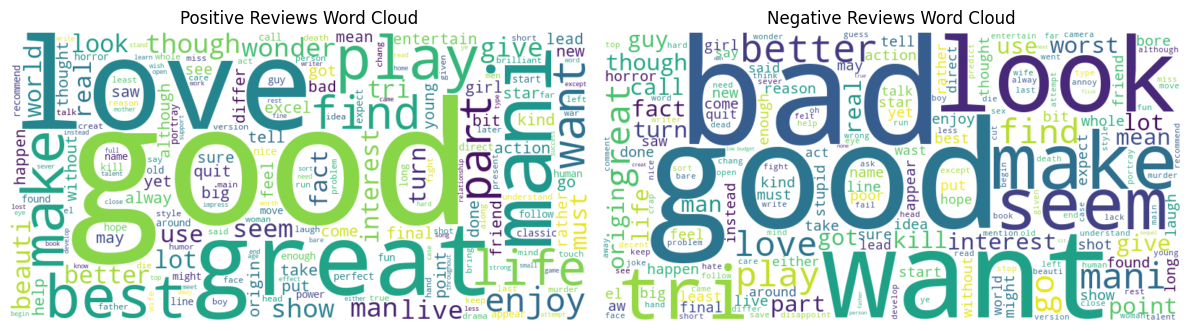

In [81]:
#word cloud

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_reviews = df[df['sentiment'] == 'positive']['cleaned_review']
negative_reviews = df[df['sentiment'] == 'negative']['cleaned_review']

positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')

plt.tight_layout()
plt.show()

This section of the notebook visualizes the most significant words in positive and negative movie reviews by leveraging the NLTK Opinion Lexicon to filter words based on sentiment. The Opinion Lexicon provides a predefined set of positive and negative words, which is utilized to refine the reviews by removing words that do not align with their respective sentiments.

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/muthonikangethe/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


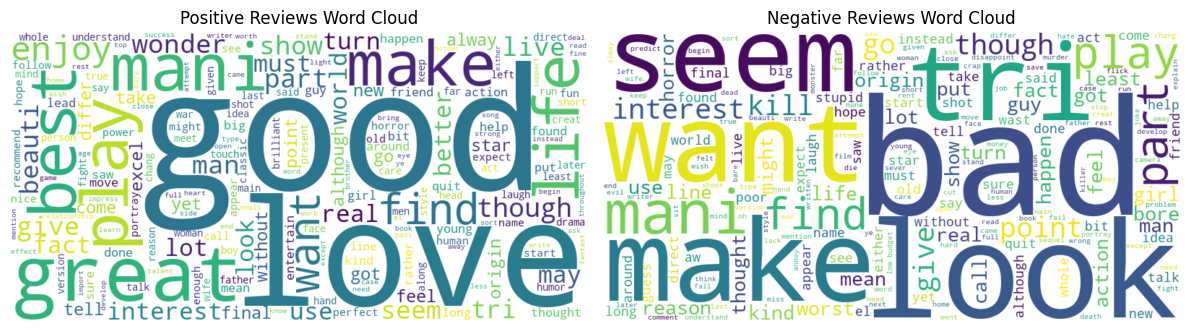

In [83]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import opinion_lexicon
import nltk


nltk.download('opinion_lexicon')


positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

def filter_words(text, sentiment):
    words = text.split()
    if sentiment == 'positive':
        return ' '.join([word for word in words if word not in negative_words])
    elif sentiment == 'negative':
        return ' '.join([word for word in words if word not in positive_words])
    return text


df['filtered_review'] = df.apply(lambda row: filter_words(row['cleaned_review'], row['sentiment']), axis=1)


positive_reviews = df[df['sentiment'] == 'positive']['filtered_review']
negative_reviews = df[df['sentiment'] == 'negative']['filtered_review']


positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)


wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')

plt.tight_layout()
plt.show()


### **TF-IDF (Term Frequency-Inverse Document Frequency)**

This section implements the TF-IDF technique to convert the movie review text into a numerical representation, enabling effective analysis and comparison of textual data. TF-IDF is a statistical measure that evaluates the importance of a word in a document relative to a collection (or corpus) of documents. It combines two key components: Term Frequency (TF), which measures how frequently a term appears in a document, and Inverse Document Frequency (IDF), which assesses how unique or rare a term is across the entire corpus. By applying the TfidfVectorizer, the cleaned reviews are transformed into a sparse matrix where each row corresponds to a review and each column represents a term from the corpus, with values reflecting the TF-IDF score. The resulting TF-IDF matrix is then converted to a DataFrame for easier manipulation and analysis.



In [86]:
def tfidf_vectorization(corpus, max_features=5000):
    vectorizer = TfidfVectorizer(max_features=max_features)
    tfidf_matrix = vectorizer.fit_transform(corpus)
    return tfidf_matrix, vectorizer.get_feature_names_out()

tfidf_matrix, tfidf_features = tfidf_vectorization(df['cleaned_review'].tolist())

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_features)

df = pd.concat([df, tfidf_df], axis=1)

df.head()

,review,sentiment,cleaned_review,pos_tagged_review,relevant_words,filtered_review,abandon,abduct,abet,aboard,...,your,youth,yr,zealot,zest,zip,zombi,zone,zoo,zoom
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,review mention hook happen first struck brutal word trust faint heart timid pull punch regard drug sex classic word call given focus experiment section prison cell glass front face inward high agenda home mani death stare deal agreement ever far away main appeal due fact show dare forget paint forget charm forget mess around ever saw struck develop got accustom high level graphic crook guard sold nickel kill order get away manner class turn prison bitch due lack street skill prison may comfort uncomfort view that get touch side,"[(review, NN), (mention, NN), (hook, NN), (happen, VB), (first, JJ), (struck, JJ), (brutal, NN), (word, NN), (trust, NN), (faint, NN), (heart, NN), (timid, VBZ), (pull, JJ), (punch, JJ), (regard, JJ), (drug, NN), (sex, NN), (classic, JJ), (word, NN), (call, NN), (given, VBN), (focus, JJ), (experiment, JJ), (section, NN), (prison, NN), (cell, NN), (glass, NN), (front, JJ), (face, NN), (inward, RB), (high, JJ), (agenda, NN), (home, NN), (mani, NN), (death, NN), (stare, NN), (deal, NN), (agreement, NN), (ever, RB), (far, RB), (away, RB), (main, JJ), (appeal, NN), (due, JJ), (fact, NN), (show, NN), (dare, NN), (forget, VB), (paint, NN), (forget, NN), (charm, NN), (forget, NN), (mess, NN), (around, IN), (ever, RB), (saw, VBD), (struck, JJ), (develop, NN), (got, VBD), (accustom, JJ), (high, JJ), (level, NN), (graphic, JJ), (crook, NN), (guard, NN), (sold, VBD), (nickel, RB), (kill, VBN), (order, NN), (get, VB), (away, RB), (manner, JJ), (class, NN), (turn, NN), (prison, NN), (bitch, NN), (due, JJ), (lack, NN), (street, NN), (skill, JJ), (prison, NN), (may, MD), (comfort, VB), (uncomfort, JJ), (view, NN), (that, IN), (get, VBP), (touch, JJ), (side, NN)]",review mention hook first struck brutal word trust faint heart pull punch regard drug sex classic word call focus experiment section prison cell glass front face high agenda home mani death stare deal agreement main appeal due fact show dare paint forget charm forget mess struck develop accustom high level graphic crook guard order manner class turn prison bi

### **Extracting Specific POS Features**

This section focuses on extracting specific linguistic features from the movie review text by isolating adjectives and adverbs based on their part-of-speech (POS) tags. Adjectives and adverbs play a critical role in sentiment analysis as they provide essential descriptive information that can influence the interpretation of the text. The function identifies words tagged as adjectives (POS tags starting with 'JJ') and adverbs (POS tags starting with 'RB') from the previously tagged reviews. By collecting these words into a single string for each review, this process highlights the descriptive elements present in the text, which are often key indicators of sentiment. The extracted adjectives and adverbs are stored in a new DataFrame column, allowing for further analysis and interpretation of the reviews based on their emotional and qualitative attributes. This extraction enhances the dataset's richness, facilitating deeper insights into the sentiments expressed in the movie reviews.

In [89]:
def extract_adjectives_adverbs(pos_tagged_review):
    return ' '.join([word for word, pos in pos_tagged_review if pos.startswith('JJ') or pos.startswith('RB')])
df['adjectives_adverbs'] = df['pos_tagged_review'].apply(extract_adjectives_adverbs)

### **Vectorizing the Extracted Text**

This section focuses on vectorizing the extracted adjectives and adverbs from the movie reviews using the TF-IDF (Term Frequency-Inverse Document Frequency) technique. Following the extraction of these specific linguistic features, the text is transformed into a numerical format suitable for further analysis. The TfidfVectorizer processes the list of extracted adjectives and adverbs, creating a sparse matrix that represents the importance of each term relative to the collection of reviews. The resulting TF-IDF matrix captures the descriptive attributes of the reviews, allowing for quantitative comparisons.

In [92]:
# tfidf_matrix, tfidf_features = tfidf_vectorization(df['adjectives_adverbs'].tolist())
# print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
# # tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf_features)
# # df = pd.concat([df, tfidf_df], axis=1)

tfidf_matrix, tfidf_features = tfidf_vectorization(df['adjectives_adverbs'].tolist())

tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf_matrix, columns=tfidf_features)

df = pd.concat([df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)


In [93]:
new_df = df.copy()

In [94]:
# Renaming duplicate columns to unique names
def rename_duplicate_columns(df):
    cols = pd.Series(df.columns)  # Convert to a Series for easy counting
    for dup in cols[cols.duplicated()].unique():  # Iterate over duplicates
        cols[cols[cols == dup].index.values.tolist()] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols  # Assign the new column names back to the DataFrame
    return df

# Apply the renaming function
new_df = rename_duplicate_columns(new_df)


# Display the renamed DataFrame and its columns
print(new_df.head())
print(new_df.columns)

In [95]:
#specify the path where you want to save the CSV file
output_file_path = './Downloads/new_df.csv'

#save the DataFrame as a CSV file
new_df.to_csv(output_file_path, index=False)

# **Model Training**

### Linear Support Vector Machine (SVM)

This section implements a Linear Support Vector Machine (SVM) to classify the sentiment of movie reviews based on the processed textual data. The Linear SVC model is instantiated and trained on the training data. Once the model is trained, predictions are generated for the test set, and the performance is evaluated. The evaluation allows for a better understanding of the model's effectiveness in classifying sentiments within the movie reviews.

In [99]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

print("DataFrame shape:", new_df.shape)
print("Missing values:\n", new_df.isnull().sum())


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(new_df['cleaned_review'])


print("TF-IDF Matrix shape:", tfidf_matrix.shape)
print("Sentiment shape:", new_df['sentiment'].shape)


y = new_df['sentiment'].values.ravel()


if tfidf_matrix.shape[0] != y.shape[0]:
    raise ValueError("Inconsistent number of samples: TF-IDF has {} samples while sentiment has {} samples.".format(tfidf_matrix.shape[0], y.shape[0]))


X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)


svm_model = LinearSVC()
svm_model.fit(X_train, y_train)


svm_predictions = svm_model.predict(X_test)


print("Linear SVM Accuracy: ", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

DataFrame shape: (50000, 10007)


/var/folders/bg/x64ncvbx1vv_c7_7d1fn_w8r0000gn/T/ipykernel_3948/916662966.py:8: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  print("Missing values:\n", new_df.isnull().sum())


Missing values:
 review                   0
sentiment                0
cleaned_review           0
pos_tagged_review        0
relevant_words           0
                     ...  
youth_1              False
yr_1                 False
zealous              False
zest_1               False
zombi_1              False
Length: 10007, dtype: Sparse[int64, False]
TF-IDF Matrix shape: (50000, 12980)
Sentiment shape: (50000,)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Linear SVM Accuracy:  0.855
              precision    recall  f1-score   support

    negative       0.86      0.84      0.85      4961
    positive       0.85      0.87      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



The Linear Support Vector Machine (SVM) model achieved an accuracy score of 0.855, indicating that approximately 85.50% of predictions on the test dataset are correct. The classification report reveals the following performance metrics for each sentiment category:

Precision: 0.86 for negative reviews and 0.85 for positive reviews, reflecting the model's ability to minimize false positives.
Recall: 0.84 for negative reviews and 0.87 for positive reviews, indicating effective capture of true sentiments.
F1-score: 0.85 for negative reviews and 0.86 for positive reviews, demonstrating a balanced performance between precision and recall.
With support values of 4961 for negative and 5039 for positive reviews, the macro and weighted averages also report an accuracy of 0.85. These results confirm the model's robustness and effectiveness in sentiment classification for movie reviews.

### Logistic Regression (LR)

This section implements Logistic Regression to classify the sentiment of movie reviews based on processed textual data. A Logistic Regression model is instantiated and trained on the training data. After fitting the model, predictions are generated for the test set, and the model's performance is evaluated using the accuracy score and a detailed classification report. This evaluation provides insights into the model's precision, recall, and F1-score for each sentiment category, offering a comprehensive assessment of its effectiveness in classifying sentiments within the movie reviews.

In [103]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(new_df['cleaned_review'])
y = new_df['sentiment'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)


log_reg_predictions = log_reg_model.predict(X_test)


print("Logistic Regression Accuracy: ", accuracy_score(y_test, log_reg_predictions))
print(classification_report(y_test, log_reg_predictions))

Logistic Regression Accuracy:  0.8616
              precision    recall  f1-score   support

    negative       0.87      0.85      0.86      4961
    positive       0.85      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



The Logistic Regression model achieved an accuracy score of 0.8616, indicating that approximately 86.16% of predictions on the test dataset are correct. The classification report shows:

Precision: 0.87 for negative reviews and 0.85 for positive reviews, reflecting the model's effectiveness in reducing false positives.
Recall: 0.85 for negative reviews and 0.87 for positive reviews, indicating strong performance in capturing true sentiments.
F1-score: 0.86 for negative and 0.86 for positive reviews, demonstrating a balanced performance.
With a total support of 4961 for negative and 5039 for positive reviews, both macro and weighted averages report an accuracy of 0.86. These results highlight the model's robustness in sentiment classification for movie reviews.

### Naive Bayes

This section implements the Naive Bayes algorithm, specifically the Multinomial Naive Bayes classifier, to analyze the sentiment of movie reviews. After fitting the model to the training data, predictions are generated for the test set. The model's performance is evaluated using the accuracy score and a detailed classification report, which provides insights into precision, recall, and F1-score for each sentiment category. These metrics help assess the model's effectiveness in classifying sentiments, highlighting the strengths and limitations of the Naive Bayes approach in the context of sentiment analysis.

In [107]:
from sklearn.naive_bayes import MultinomialNB


nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_predictions = nb_model.predict(X_test)

print("Naive Bayes Accuracy: ", accuracy_score(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))

Naive Bayes Accuracy:  0.8369
              precision    recall  f1-score   support

    negative       0.84      0.83      0.83      4961
    positive       0.84      0.84      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



The Naive Bayes model achieved an accuracy score of 0.8369, indicating that approximately 83.69% of the predictions on the test dataset were correct. The classification report reveals:

Precision: 0.84 for both negative and positive reviews, demonstrating effective minimization of false positives.
Recall: 0.83 for negative reviews and 0.84 for positive reviews, indicating strong performance in capturing true sentiments.
F1-score: 0.83 for negative reviews and 0.84 for positive reviews, reflecting a balanced performance between precision and recall.
With a support of 4961 for negative and 5039 for positive reviews, both macro and weighted averages also report an accuracy of 0.84. These results underscore the model's effectiveness in sentiment classification for movie reviews.

### **Models Comparison Using Accuracy, Precision, Recall, and F1-Score**

This section presents a comparative analysis of the models used for sentiment classification of movie reviews:

In [111]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

results = {
    'Model': ['Linear SVM', 'Logistic Regression', 'Naive Bayes'],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)

evaluate_model(y_test, svm_predictions, 'Linear SVM')
evaluate_model(y_test, log_reg_predictions, 'Logistic Regression')
evaluate_model(y_test, nb_predictions, 'Naive Bayes')

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision  Recall  F1-Score
0           Linear SVM    0.8550   0.855136  0.8550  0.854972
1  Logistic Regression    0.8616   0.861764  0.8616  0.861570
2          Naive Bayes    0.8369   0.836918  0.8369  0.836890


The Logistic Regression model exhibits the highest accuracy (0.8616) and demonstrates strong performance across all metrics, including precision, recall, and F1-score. The Linear SVM model follows closely, while the Naive Bayes model, although effective, shows slightly lower scores across all metrics. This comparison highlights the advantages of Logistic Regression in this particular sentiment analysis task, providing valuable insights for model selection in future applications.

### **Visualizing the Confusion Matrix for each model**

This section focuses on visualizing the performance of different sentiment classification models through confusion matrices. The confusion matrix is a valuable tool that provides insights into the model's predictive performance by illustrating the counts of true positive, true negative, false positive, and false negative predictions. The x-axis represents the predicted classes, while the y-axis denotes the true classes. 

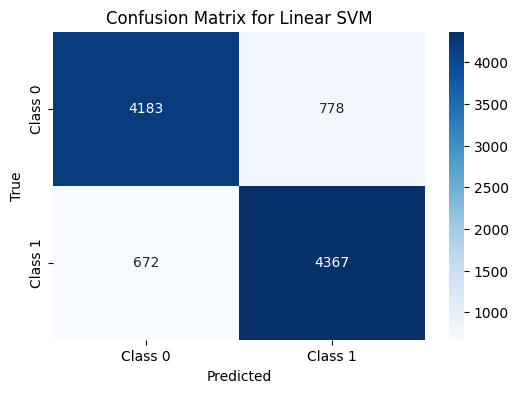

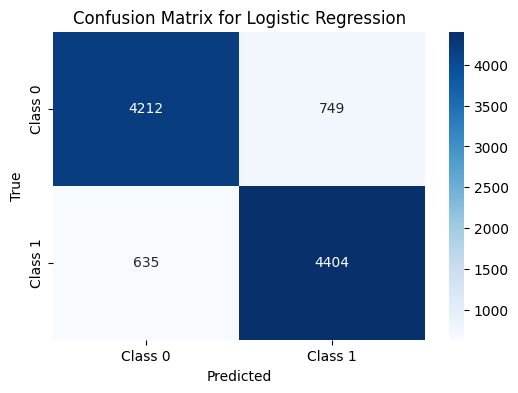

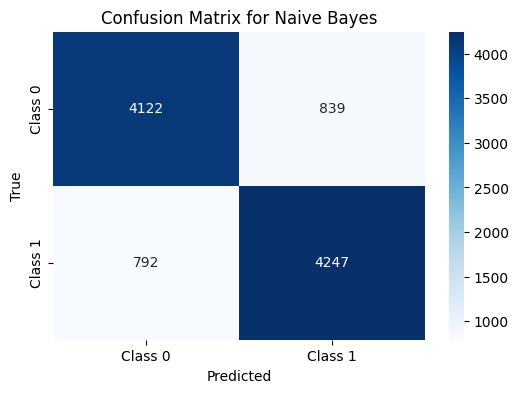

In [115]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_test, svm_predictions, 'Linear SVM')
plot_confusion_matrix(y_test, log_reg_predictions, 'Logistic Regression')
plot_confusion_matrix(y_test, nb_predictions, 'Naive Bayes')